# Sketchbook for galaxy plotter

Here you will find a quickly written program to handle galaxy data, from download to encode.

You will need to install mw_plot, make sure to load a proper environment and then follow the instr



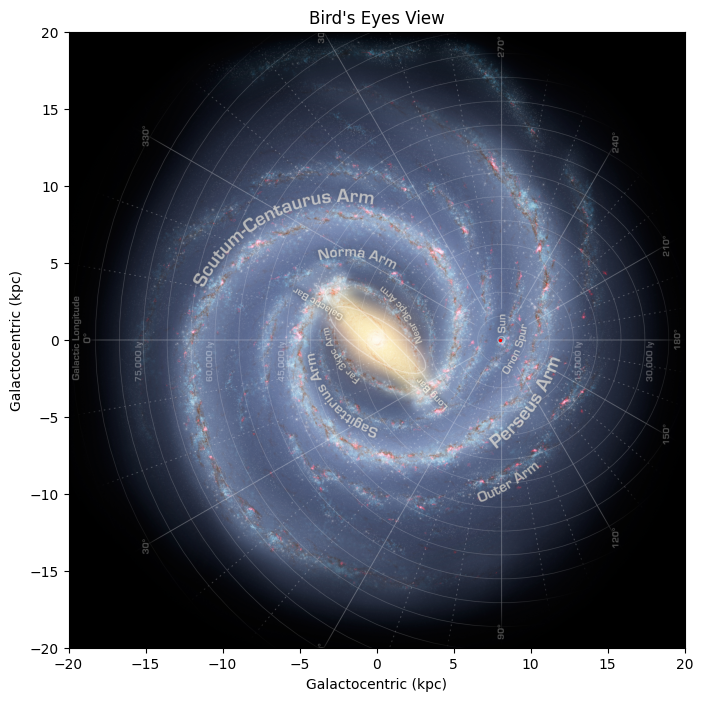

In [1]:
#Task 1: Install the git package and reproduce the image of the milky way via MWSkyMap (see attached code).
import numpy as np
from astropy import units as u
from mw_plot import MWFaceOn

mw1 = MWFaceOn(
    radius=20 * u.kpc,
    unit=u.kpc,
    coord="galactocentric",
    annotation=True,
    figsize=(10, 8),
)

mw1.title = "Bird's Eyes View"

mw1.scatter(8 * u.kpc, 0 * u.kpc, c="r", s=2)

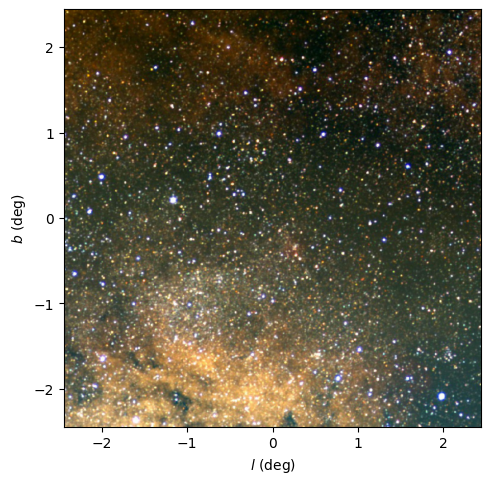

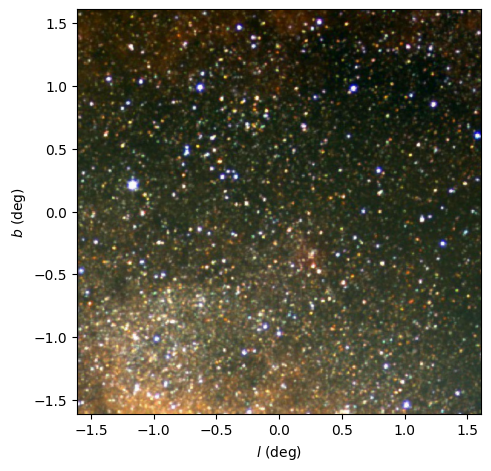

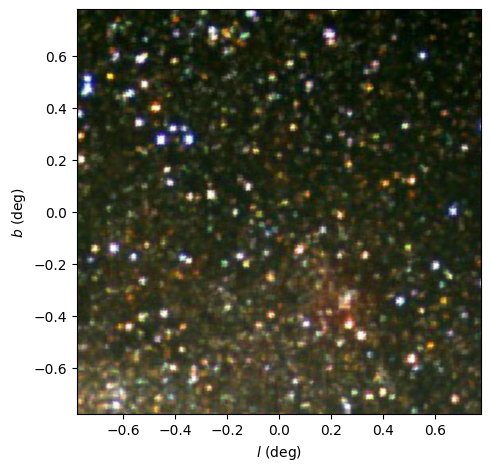

In [2]:
#Task 2: Generate a few (at least three in total) visualizations of the milky way sector starting in different centers (try "M31") and with different radius (be careful on the units!).
import matplotlib.pyplot as plt
from astropy import units as u
from mw_plot import MWSkyMap

mw1 = MWSkyMap(
    #center="M31",
    radius=(8800, 8800) * u.arcsec,
    background="Mellinger color optical survey",
)
fig, ax = plt.subplots(figsize=(5, 5))
mw1.transform(ax)
mw1.savefig('galaxy_large.png')

mw2 = MWSkyMap(
    #center="",
    radius=(5800, 5800) * u.arcsec,
    background="Mellinger color optical survey",
)
fig, ax = plt.subplots(figsize=(5, 5))
mw2.transform(ax)
mw2.savefig('galaxy_medium.png')

mw3 = MWSkyMap(
    #center="",
    radius=(2800, 2800) * u.arcsec,
    background="Mellinger color optical survey",
)
fig, ax = plt.subplots(figsize=(5, 5))
mw3.transform(ax)
mw3.savefig('galaxy_small.png')
plt.show()



Shape: (500, 500, 3)
Data type: uint8


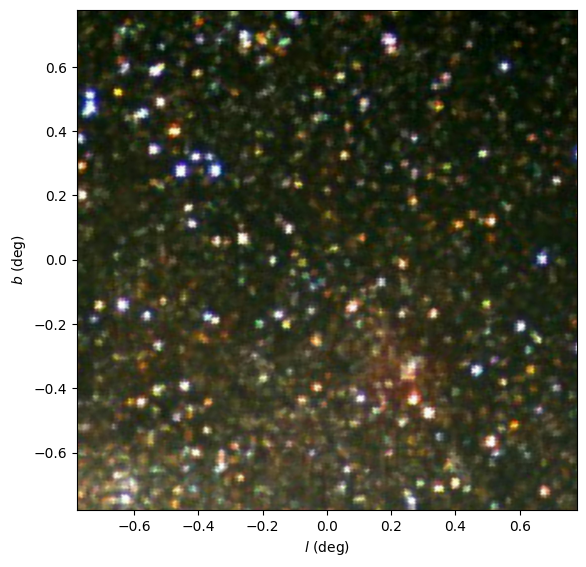

In [68]:
def plt2rgbarr(fig):
    """
    A function to transform a matplotlib to a 3d rgb np.array 

    Input
    -----
    fig: matplotlib.figure.Figure
        The plot that we want to encode.        

    Output
    ------
    np.array(ndim, ndim, 3): A 3d map of each pixel in a rgb encoding (the three dimensions are x, y, and rgb)
    
    """
    fig.subplots_adjust(left=0, right=1, top=1, bottom=0)
    fig.canvas.draw()
    rgba_buf = fig.canvas.buffer_rgba()
    w, h = fig.canvas.get_width_height()
    rgba_arr = np.frombuffer(rgba_buf, dtype=np.uint8).reshape((h, w, 4))
    return rgba_arr[:, :, :3]

#Task 3: Convert the image generated into a rgb np.array (each pixel will be a list of 3 number, Red, Green, Blue (rbg).

mw3 = MWSkyMap(
    radius=(2800, 2800) * u.arcsec,
    background="Mellinger color optical survey",
)
fig, ax = plt.subplots(figsize=(5, 5))
mw3.transform(ax)
rgb_array = plt2rgbarr(fig)

print(f"Shape: {rgb_array.shape}")
print(f"Data type: {rgb_array.dtype}")

Task 4: Ideate, describe in words and generate a set of categories from the task 3 data (e.g. red? 
Grey? ). This is your encoding

Bildet viser stjerner med forskjellige farger. Men felles for alle farger kommer fra RGB, vi kan dele verdiene inn i disse 3 kategoriene.
Gjør om hver piksel i bildet og sjekk hvilken farge den tilhører.



In [69]:
# Task 4
def categorize_pixels(rgb_array):
    """
    Kategoriser piksler som rød, grønn eller blå
    """
    h, w, _ = rgb_array.shape
    categories = np.zeros((h, w), dtype=int)

    for i in range(h):
        for j in range(w):
            r, g, b = rgb_array[i, j]
            
            if r > g and r > b:
                categories[i, j] = 0
            elif g > r and g > b:
                categories[i, j] = 1
            elif b > r and b > g:
                categories[i, j] = 2
    
    return categories

# rgb_array fra Task 3
categories = categorize_pixels(rgb_array)
print(f"Kategori-shape: {categories.shape}")

Kategori-shape: (500, 500)


Cluster centers:
[[254.31262223 254.30409274 254.17706934]
 [ 44.35234081  46.3255016   27.51250523]
 [114.88264969 104.43210387  78.30846841]
 [ 19.66626597  27.56424932  11.42211497]
 [ 75.0382696   68.59010878  46.374229  ]
 [178.71184023 169.69900143 146.63480742]]


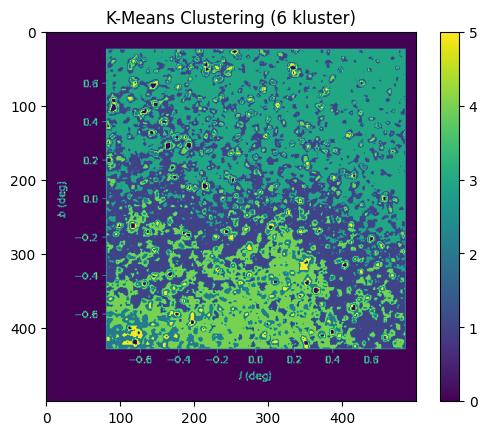

In [ ]:
# Task 5: Use K-NN (Nearest neighbor, not discussed in class but extremely simple) or K-means to cluster the data
from sklearn.cluster import KMeans

h, w, _ = rgb_array.shape
rgb_flat = rgb_array.reshape(-1, 3)

# Prøv 6 kluster
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
kmeans.fit(rgb_flat)
cluster_labels = kmeans.labels_
predicted_image = cluster_labels.reshape(h, w)

print(f"Cluster centers:\n{kmeans.cluster_centers_}")
plt.imshow(predicted_image, cmap='viridis')
plt.title('K-Means Clustering (6 kluster)')
plt.colorbar()
plt.show()

# Deler bildet i 6 fargegrupper for å se hvilken gruppe piskelen tilhører 

In [132]:
# remove padding around the axes and generate a 2d np.array

img_array = plt2rgbarr(fig)
print(img_array.shape)  


(500, 1200, 3)


In [133]:
# A grey encoding
grey = np.sum(img_array[: , : , :] * np.array([0.299, 0.587, 0.114]), axis=2)  # From RGB to grey
x, y = [], []
for ig, g in enumerate(grey):
    for ij, j in enumerate(g):
        if j > 230:
            x.append(ig)
            y.append(ij)
    

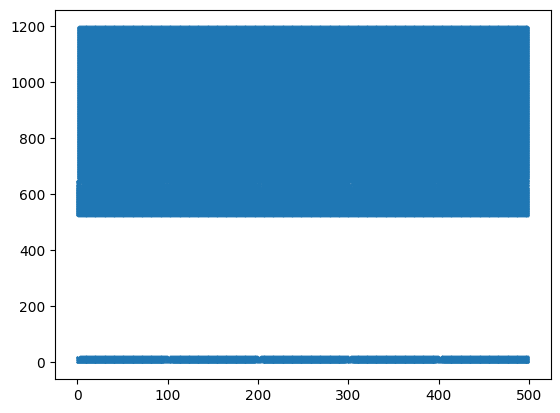

In [134]:
plt.scatter(x, y, s=0.1)